In [1]:
import sys
sys.path.append('../utils/')
from utils_models import *

In [2]:
max_ql = 30
max_ol = 100
EJ = 3
EC = EJ/4
EL = EJ/20.5
Er = 8.46111172

g = 0.2
w_d = 8.460155465243822
amp = 0.003

tot_time =920
tlist = np.linspace(0, tot_time, tot_time)
system  =  FluxoniumOscillatorSystem(
                EJ = EJ,
                EC = EC,
                EL = EL,
                Er = Er,
                g_strength = g,
                qubit_level = max_ql,
                osc_level = max_ol,
                products_to_keep=[[ql, ol] for ql in range(15) for ol in range(max_ol) ],
                computaional_states = '1,2',
                )

In [3]:
with open('sesolve_large_dim_a003.pkl', 'rb') as file:
    results = pickle.load(file)

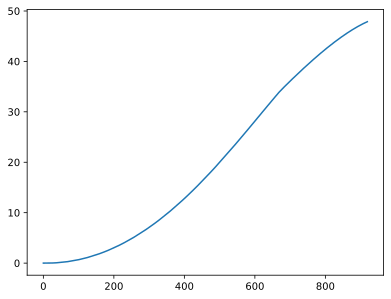

In [4]:
plt.plot(results[0].expect[1])

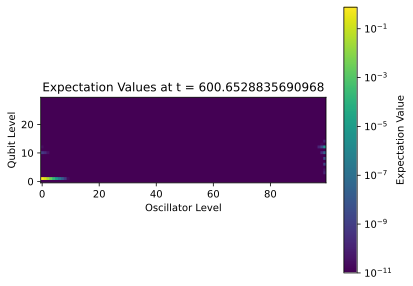

In [5]:
from utils_visualization import *
plot_heatmap(results[1],600,system.product_to_dressed,max_ql,max_ol,LogNorm())

In [45]:
lists = []
for ql in [0 ,1,2]:
    pop_list = []
    for t_idx in tqdm(range(len(tlist))[::10], desc = "t loop"):
        dm = results[ql].states[t_idx]
        pop_sum = 1
        for q in range(15):
            if q == ql:
                for o in range(max_ol):
                    product_state = (q, o)
                    dressed_state = system.product_to_dressed[product_state]
                    basis_state = system.truncate_function(qutip.basis(max_ql * max_ol,  dressed_state))
                    expectation_value = qutip.expect(basis_state * basis_state.dag(), dm)
                    pop_sum -= expectation_value

        pop_list.append(pop_sum)
    lists.append(pop_list)


t loop: 100%|██████████| 92/92 [03:36<00:00,  2.35s/it]


In [5]:
with open('sesolve_large_dim_outside_ori_ladder_list_g0.2a003.pkl', 'wb') as file:
    pickle.dump(lists, file)

Text(0.5, 0, 't (ns)')

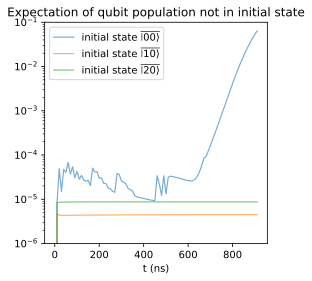

In [46]:
from utils_models import *
plt.figure(figsize=(4,4))
for ql,pop_list in enumerate(lists): 
    plt.plot(tlist[::10],pop_list,label = rf"initial state $\overline{{\left|{ql}0\right>}}$",linewidth =1.2,alpha = 0.6)
plt.yscale('log')
plt.ylim(1e-6,1e-1)
plt.legend()
# plt.title('expecation of qubit not being in initial state,\n sesolve with 15 level qbt, 40 level osc')
plt.title('Expectation of qubit population not in initial state')
plt.xlabel('t (ns)')

Text(0.5, 0, 't (ns)')

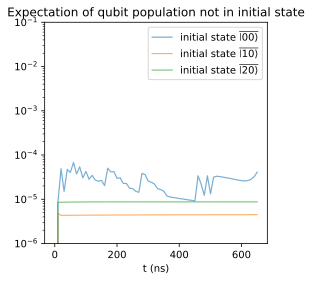

In [49]:
from utils_models import *
plt.figure(figsize=(4,4))
for ql,pop_list in enumerate(lists): 
    plt.plot(tlist[:660][::10],pop_list[:len(tlist[:660][::10])],label = rf"initial state $\overline{{\left|{ql}0\right>}}$",linewidth =1.2,alpha = 0.6)
plt.yscale('log')
plt.ylim(1e-6,1e-1)
plt.legend()
# plt.title('expecation of qubit not being in initial state,\n sesolve with 15 level qbt, 40 level osc')
plt.title('Expectation of qubit population not in initial state')
plt.xlabel('t (ns)')

In [6]:
lists = []
for ql in [0,1,2]:
    pops_list = [[] for _ in range(15)]
    for t_idx in tqdm(range(len(tlist)), desc = "t loop"):
        dm = results[ql].states[t_idx]
        for q in range(15):
            sum_at_this_t_for_this_q = 0
            for o in range(system.osc.truncated_dim):
                product_state = (q, o)
                dressed_state = system.product_to_dressed[product_state]
                basis_state = system.truncate_function(qutip.basis(max_ql*max_ol, dressed_state))
                expectation_value = qutip.expect(basis_state * basis_state.dag(), dm)
                sum_at_this_t_for_this_q += expectation_value
            pops_list[q].append(sum_at_this_t_for_this_q)
    lists.append(pops_list)

with open('sesolve_large_dim_pop_list_g0.2a003.pkl', 'wb') as file:
    pickle.dump(lists, file)

t loop:   0%|          | 2/920 [02:30<19:08:55, 75.09s/it]


KeyboardInterrupt: 

In [3]:
with open('sesolve_large_dim_pop_list_g0.2a003.pkl', 'rb') as file:
    lists = pickle.load(file)
 

In [61]:
len(lists[0][0])

92

Text(0.5, 0, 't (ns)')

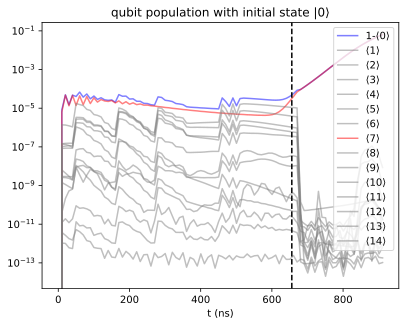

In [75]:
initial_ql = 0

qls = list(range(15))
for ql,pop_list in zip(qls,lists[initial_ql]): 
    if ql == initial_ql:
        plt.plot(tlist[::10],1-np.array(pop_list),label = rf"1-$\langle{ql}\rangle$",color='blue',alpha=0.5)
    elif ql != 7:
        plt.plot(tlist[::10],pop_list,label = rf"$\langle{ql}\rangle$",color='grey',alpha=0.5)
    else:
        plt.plot(tlist[::10],pop_list,label = rf"$\langle{ql}\rangle$",color='red',alpha=0.5)


plt.axvline(x=656, color='k', linestyle='--')

plt.title(rf'qubit population with initial state $|{initial_ql}\rangle$')
plt.yscale('log')
plt.legend()
plt.legend()
plt.xlabel('t (ns)')

Text(0.5, 0, 't (ns)')

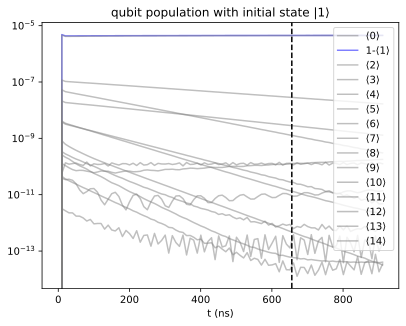

In [77]:
initial_ql = 1

qls = list(range(15))
for ql,pop_list in zip(qls,lists[initial_ql]): 
    if ql == initial_ql:
        plt.plot(tlist[::10],1-np.array(pop_list),label = rf"1-$\langle{ql}\rangle$",color='blue',alpha=0.5)
    elif ql != 20:
        plt.plot(tlist[::10],pop_list,label = rf"$\langle{ql}\rangle$",color='grey',alpha=0.5)
    else:
        plt.plot(tlist[::10],pop_list,label = rf"$\langle{ql}\rangle$",color='red',alpha=0.5)


plt.axvline(x=656, color='k', linestyle='--')

plt.title(rf'qubit population with initial state $|{initial_ql}\rangle$')
plt.yscale('log')
plt.legend()
plt.legend()
plt.xlabel('t (ns)')

Text(0.5, 0, 't (ns)')

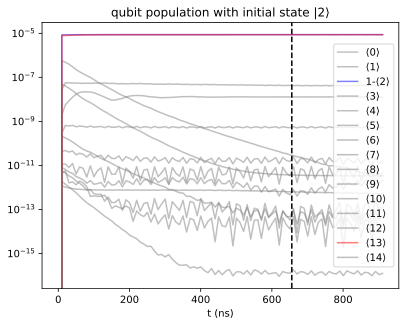

In [90]:
initial_ql = 2

qls = list(range(15))
for ql,pop_list in zip(qls,lists[initial_ql]): 
    if ql == initial_ql:
        plt.plot(tlist[::10],1-np.array(pop_list),label = rf"1-$\langle{ql}\rangle$",color='blue',alpha=0.5)
    elif ql not in [13]:
        plt.plot(tlist[::10],pop_list,label = rf"$\langle{ql}\rangle$",color='grey',alpha=0.5)
    else:
        plt.plot(tlist[::10],pop_list,label = rf"$\langle{ql}\rangle$",color='red',alpha=0.5)


plt.axvline(x=656, color='k', linestyle='--')

plt.title(rf'qubit population with initial state $|{initial_ql}\rangle$')
plt.yscale('log')
plt.legend()
plt.legend()
plt.xlabel('t (ns)')

In [5]:
from utils_visualization import *

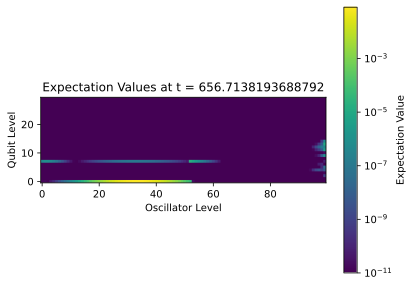

In [102]:
plot_heatmap(results[0],656, system.product_to_dressed, system.qbt.truncated_dim, system.osc.truncated_dim,LogNorm())

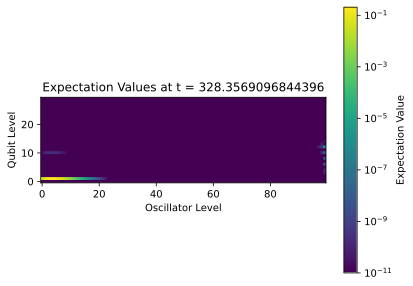

In [8]:
plot_heatmap(results[1],328, system.product_to_dressed, system.qbt.truncated_dim, system.osc.truncated_dim,LogNorm())

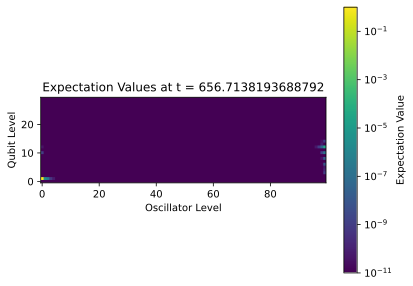

In [101]:
plot_heatmap(results[1],656, system.product_to_dressed, system.qbt.truncated_dim, system.osc.truncated_dim,LogNorm())

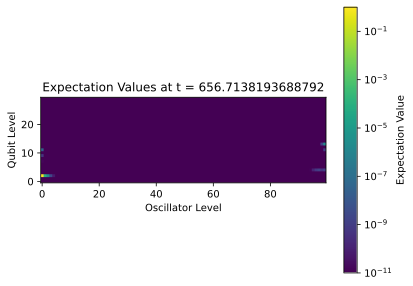

In [105]:
plot_heatmap(results[2],656, system.product_to_dressed, system.qbt.truncated_dim, system.osc.truncated_dim,LogNorm())